In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import json

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
ngram_data = "../csv_data/ngram_results.csv.gz"

In [3]:
ngram_df = pd.read_csv(ngram_data, error_bad_lines=False)
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str
0,78736,"[[Barbara, great, host, stayed, three, months,...","[[Barbara great, great host, stayed three, thr..."
1,78705,"[[space, extremely, clean, well, taken, care, ...","[[space extremely, extremely clean, clean well..."
2,78752,"[[Stephanie, perfect, hostess, always, prompt,...","[[Stephanie perfect, perfect hostess, always p..."
3,78734,"[[Pictures, don't, place, justice, rooms, nice...","[[Pictures don't, don't place, place justice, ..."
4,78729,"[[stayed, location, two, nights, could, deligh...","[[stayed location, location two, two nights, n..."


In [4]:
# remove extraneous characters
# convert bigrams to 'unigram' for word cloud
ngram_df["unigram_list_str"] = ngram_df["unigram_list_str"].str.lower().str.replace("[","")\
                                                           .str.replace("]","").str.replace("&","")\
                                                           .str.replace(" ","").str.replace(", ",",")
                                                            
ngram_df["bigram_list_str"] = ngram_df["bigram_list_str"].str.lower().str.replace("[","")\
                                                         .str.replace("]","").str.replace("&","")\
                                                         .str.replace(", ",",").str.replace(" ","_")

In [5]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str
0,78736,"barbara,great,host,stayed,three,months,summer,...","barbara_great,great_host,stayed_three,three_mo..."
1,78705,"space,extremely,clean,well,taken,care,great,ne...","space_extremely,extremely_clean,clean_well,wel..."
2,78752,"stephanie,perfect,hostess,always,prompt,reply,...","stephanie_perfect,perfect_hostess,always_promp..."
3,78734,"pictures,don't,place,justice,rooms,nicer,bigge...","pictures_don't,don't_place,place_justice,rooms..."
4,78729,"stayed,location,two,nights,could,delighted,us,...","stayed_location,location_two,two_nights,nights..."


In [6]:
# define stopwords to remove in word cloud
stopwords = set(STOPWORDS)
unigram_stopwords = ["clean", "nice", "perfect", "austin", "great", "place", "stay", "definitely", 
                     "would", "host", "house", "location", "home", "beautiful", "highly", "recommend",
                     "comfortable", "space", "would", "us", "everything", "'s", "bed", "amazing",
                     "room", "apartment", "ing", "really", "loved", "wonderful", "good", "needed",
                     "time", "thank", "need", "ed"]
bigram_stopwords = ["would_recommend", "definitely_recommend", "highly_recommend", "great_place", 
                    "great_stay", "great_host", "would_definitely", "definitely_stay", "place_stay", 
                    "great_location", "would_stay", "place_great", "location_great", "highly_recommended",
                    "clean_comfortable", "within_walking", "walking_distance", "stay_austin",
                    "house_clean", "place_clean", "recommend_staying", "everything_needed",
                    "would_highly", "recommend_place", "made_us", "us_feel", "nice_place"]
stopwords.update(unigram_stopwords)
stopwords.update(bigram_stopwords)

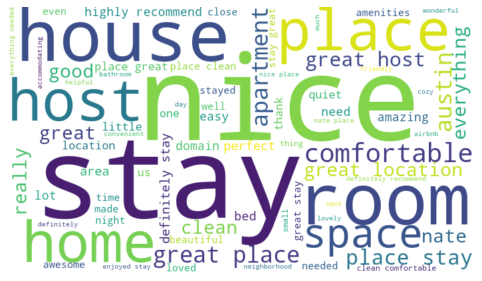

In [7]:
# word cloud example before excluding stopwords
test_text = ngram_df.unigram_list_str[10]
wordcloud = WordCloud(background_color="white", max_words=75, 
                      width=700, height=400, relative_scaling=0).generate(test_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

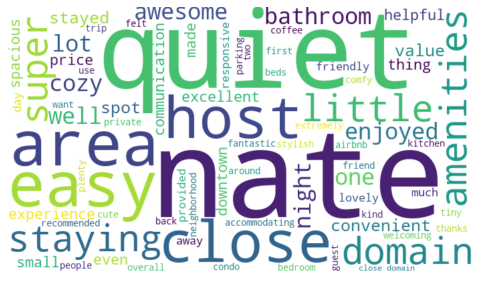

In [8]:
# word cloud example after excluding stopwords
test_text = ngram_df.unigram_list_str[10]
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=75, 
                      width=700, height=400, relative_scaling=0).generate(test_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [9]:
# create and save all the unigram word clouds
for idx in range(ngram_df.shape[0]):
    filename = ngram_df.zipcode[idx]
    text = ngram_df.unigram_list_str[idx]
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=75, 
                          width=700, height=400, relative_scaling=0).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    # plt.show()
    plt.savefig("../static/images/word_clouds/unigrams/unigram_" + str(filename) + ".png", dpi=100)
    plt.close()

In [10]:
# create and save all the bigram word clouds
for idx in range(ngram_df.shape[0]):
    filename = ngram_df.zipcode[idx]
    text = ngram_df.bigram_list_str[idx]
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50,
                          width=700, height=400, relative_scaling=0).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    # plt.show()
    plt.savefig("../static/images/word_clouds/bigrams/bigram_" + str(filename) + ".png", dpi=100)
    plt.close()

In [11]:
for word in unigram_stopwords:
    ngram_df["unigram_list_str"] = ngram_df["unigram_list_str"].str.replace(word,"")
    
for word in bigram_stopwords:
    ngram_df["bigram_list_str"] = ngram_df["bigram_list_str"].str.replace(word,"")

In [12]:
ngram_df["unigram_list"] = ngram_df["unigram_list_str"].str.split(",")
ngram_df["bigram_list"] = ngram_df["bigram_list_str"].str.split(",")

ngram_df["unigram_count"] = ngram_df["unigram_list"].apply(Counter)
ngram_df["bigram_count"] = ngram_df["bigram_list"].apply(Counter)

In [13]:
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str,unigram_list,bigram_list,unigram_count,bigram_count
0,78736,"barbara,,,,three,months,summer,,thoroughly,enj...","barbara_great,,stayed_three,three_months,month...","[barbara, , , , three, months, summer, , thoro...","[barbara_great, , stayed_three, three_months, ...","{'barbara': 2, '': 9609, 'three': 19, 'months'...","{'barbara_great': 1, '': 1184, 'stayed_three':..."
1,78705,",extremely,,well,taken,care,,neighborhood,,,,,...","space_extremely,extremely_clean,clean_well,wel...","[, extremely, , well, taken, care, , neighborh...","[space_extremely, extremely_clean, clean_well,...","{'': 65514, 'extremely': 366, 'well': 1116, 't...","{'space_extremely': 2, 'extremely_clean': 45, ..."
2,78752,"stephanie,,ess,always,prompt,reply,friendly,th...","stephanie_perfect,perfect_hostess,always_promp...","[stephanie, , ess, always, prompt, reply, frie...","[stephanie_perfect, perfect_hostess, always_pr...","{'stephanie': 19, '': 20791, 'ess': 38, 'alway...","{'stephanie_perfect': 1, 'perfect_hostess': 3,..."
3,78734,"pictures,don't,,jtice,s,r,bigger,pictures,make...","pictures_don't,don't_place,place_justice,rooms...","[pictures, don't, , jtice, s, r, bigger, pictu...","[pictures_don't, don't_place, place_justice, r...","{'pictures': 165, 'don't': 73, '': 29766, 'jti...","{'pictures_don't': 11, 'don't_place': 3, 'plac..."
4,78729,",,two,nights,could,delight,,thought,,,immacula...","stayed_location,location_two,two_nights,nights...","[, , two, nights, could, delight, , thought, ,...","[stayed_location, location_two, two_nights, ni...","{'': 13036, 'two': 56, 'nights': 35, 'could': ...","{'stayed_location': 1, 'location_two': 1, 'two..."


In [14]:
def top_10_words(row):
    # remove these entries since not real words
    del row['']
    del row['s']
    return sorted(row.items(), key=operator.itemgetter(1), reverse=True)[:10]

In [15]:
ngram_df["unigram_top10"] = ngram_df["unigram_count"].apply(top_10_words)
ngram_df["bigram_top10"] = ngram_df["bigram_count"].apply(top_10_words)

In [16]:
# only care about these columns
ngram_top10_df = ngram_df[["zipcode", "unigram_top10", "bigram_top10"]]
ngram_df.head()

,zipcode,unigram_list_str,bigram_list_str,unigram_list,bigram_list,unigram_count,bigram_count,unigram_top10,bigram_top10
0,78736,"barbara,,,,three,months,summer,,thoroughly,enj...","barbara_great,,stayed_three,three_months,month...","[barbara, , , , three, months, summer, , thoro...","[barbara_great, , stayed_three, three_months, ...","{'barbara': 2, 'three': 19, 'months': 10, 'sum...","{'barbara_great': 1, 'stayed_three': 5, 'three...","[(enjoy, 254), (back, 230), (quiet, 221), (joh...","[(john_vivien, 100), (hill_country, 82), (brit..."
1,78705,",extremely,,well,taken,care,,neighborhood,,,,,...","space_extremely,extremely_clean,clean_well,wel...","[, extremely, , well, taken, care, , neighborh...","[space_extremely, extremely_clean, clean_well,...","{'extremely': 366, 'well': 1116, 'taken': 44, ...","{'space_extremely': 2, 'extremely_clean': 45, ...","[(easy, 1606), (close, 1578), (walk, 1412), (d...","[(ut_campus, 338), (quick_respond, 281), (good..."
2,78752,"stephanie,,ess,always,prompt,reply,friendly,th...","stephanie_perfect,perfect_hostess,always_promp...","[stephanie, , ess, always, prompt, reply, frie...","[stephanie_perfect, perfect_hostess, always_pr...","{'stephanie': 19, 'ess': 38, 'always': 114, 'p...","{'stephanie_perfect': 1, 'perfect_hostess': 3,...","[(chalu, 529), (easy, 434), (downtown, 402), (...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)..."
3,78734,"pictures,don't,,jtice,s,r,bigger,pictures,make...","pictures_don't,don't_place,place_justice,rooms...","[pictures, don't, , jtice, s, r, bigger, pictu...","[pictures_don't, don't_place, place_justice, r...","{'pictures': 165, 'don't': 73, 'jtice': 71, 'r...","{'pictures_don't': 11, 'don't_place': 3, 'plac...","[(lake, 1509), (enjoy, 794), (back, 690), (vie...","[(lake_travis, 536), (great_time, 185), (enjoy..."
4,78729,",,two,nights,could,delight,,thought,,,immacula...","stayed_location,location_two,two_nights,nights...","[, , two, nights, could, delight, , thought, ,...","[stayed_location, location_two, two_nights, ni...","{'two': 56, 'nights': 35, 'could': 105, 'delig...","{'stayed_location': 1, 'location_two': 1, 'two...","[(quiet, 332), (neighborhood, 263), (easy, 238...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),..."


In [17]:
def unigram_word_dict(row):
    new_dict = {}
    words_lst = []
    words_cnt = []
    
    for x in row["unigram_top10"]:
        words_lst.append(x[0])
        words_cnt.append(x[1])
        
    new_dict[str(row["zipcode"])] = {
                                      'unigram_words' : words_lst,
                                      'unigram_count' : words_cnt
                                    }
    return new_dict

def bigram_word_dict(row):
    new_dict = {}
    words_lst = []
    words_cnt = []
    
    for x in row["bigram_top10"]:
        words_lst.append(x[0])
        words_cnt.append(x[1])
        
    new_dict[str(row["zipcode"])] = {
                                      'bigram_words' : words_lst,
                                      'bigram_count' : words_cnt
                                    }
    return new_dict

# def word_dict(row, **kwargs):
#     if col_type == 0:
#         col = 'unigram'
#     else:
#         col='bigram'   
    
#     new_dict = {}
#     words_lst = []
#     words_cnt = []
    
#     for x in row[col + "_top10"]:
#         words_lst.append(x[0])
#         words_cnt.append(x[1])
        
#     new_dict[str(row["zipcode"])] = {
#                                       col + '_words' : words_lst,
#                                       col + '_count' : word_cnt
#                                     }
#     return new_dict

In [18]:
ngram_top10_df["unigram_dict"] = ngram_top10_df.apply(unigram_word_dict, axis=1)
ngram_top10_df["bigram_dict"] = ngram_top10_df.apply(bigram_word_dict, axis=1)
# ngram_top10_df.apply(word_dict, col_type=1, axis=1)

/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
ngram_top10_df.head()

,zipcode,unigram_top10,bigram_top10,unigram_dict,bigram_dict
0,78736,"[(enjoy, 254), (back, 230), (quiet, 221), (joh...","[(john_vivien, 100), (hill_country, 82), (brit...","{'78736': {'unigram_words': ['enjoy', 'back', ...","{'78736': {'bigram_words': ['john_vivien', 'hi..."
1,78705,"[(easy, 1606), (close, 1578), (walk, 1412), (d...","[(ut_campus, 338), (quick_respond, 281), (good...","{'78705': {'unigram_words': ['easy', 'close', ...","{'78705': {'bigram_words': ['ut_campus', 'quic..."
2,78752,"[(chalu, 529), (easy, 434), (downtown, 402), (...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)...","{'78752': {'unigram_words': ['chalu', 'easy', ...",{'78752': {'bigram_words': ['quiet_neighborhoo...
3,78734,"[(lake, 1509), (enjoy, 794), (back, 690), (vie...","[(lake_travis, 536), (great_time, 185), (enjoy...","{'78734': {'unigram_words': ['lake', 'enjoy', ...","{'78734': {'bigram_words': ['lake_travis', 'gr..."
4,78729,"[(quiet, 332), (neighborhood, 263), (easy, 238...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),...","{'78729': {'unigram_words': ['quiet', 'neighbo...","{'78729': {'bigram_words': ['enjoyed_stay', 'q..."


In [20]:
# save off to view as csv table for reference
ngram_top10_df.to_csv("../static/data/top_words_by_zipcode.csv", index=False)

## Convert and save to json files for plotly

In [21]:
# example of how to access each zipcode dictionary entry
ngram_top10_df["unigram_dict"][0]

{'78736': {'unigram_words': ['enjoy',
   'back',
   'quiet',
   'john',
   'casita',
   'meum',
   'andrea',
   'area',
   'even',
   'well'],
  'unigram_count': [254, 230, 221, 193, 192, 189, 187, 181, 176, 175]}}

In [22]:
# example of how to access elements within zipcode dictionary
list(ngram_top10_df["unigram_dict"].values)[0]['78736']

{'unigram_words': ['enjoy',
  'back',
  'quiet',
  'john',
  'casita',
  'meum',
  'andrea',
  'area',
  'even',
  'well'],
 'unigram_count': [254, 230, 221, 193, 192, 189, 187, 181, 176, 175]}

In [23]:
uni_dict_lst = list(ngram_top10_df["unigram_dict"].values)
bi_dict_lst  = list(ngram_top10_df["bigram_dict"].values)

In [24]:
uni_dict = {}
for x in uni_dict_lst:
    key = list(x.keys())[0]
    value = list(x.values())[0]
    uni_dict[key] = value

In [25]:
bi_dict = {}
for x in bi_dict_lst:
    key = list(x.keys())[0]
    value = list(x.values())[0]
    bi_dict[key] = value

In [26]:
filename = '../static/data/unigram.json'
with open(filename, 'w') as f:
        json.dump(uni_dict, f)

In [27]:
filename = '../static/data/bigram.json'
with open(filename, 'w') as f:
        json.dump(bi_dict, f)

## For auto-generated word cloud using Anychart

In [28]:
def top_50_words(row):
    # remove these entries since not real words
    del row['']
    del row['s']
    
    return sorted(row.items(), key=operator.itemgetter(1), reverse=True)[:50]

In [29]:
new_ngram_df = ngram_df[["zipcode", "unigram_count", "bigram_count"]]
new_ngram_df["unigram50"] = new_ngram_df["unigram_count"].apply(top_50_words)
new_ngram_df["bigram50"] = new_ngram_df["bigram_count"].apply(top_50_words)
new_ngram_df.head()

/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,zipcode,unigram_count,bigram_count,unigram50,bigram50
0,78736,"{'barbara': 2, 'three': 19, 'months': 10, 'sum...","{'barbara_great': 1, 'stayed_three': 5, 'three...","[(enjoy, 254), (back, 230), (quiet, 221), (joh...","[(john_vivien, 100), (hill_country, 82), (brit..."
1,78705,"{'extremely': 366, 'well': 1116, 'taken': 44, ...","{'space_extremely': 2, 'extremely_clean': 45, ...","[(easy, 1606), (close, 1578), (walk, 1412), (d...","[(ut_campus, 338), (quick_respond, 281), (good..."
2,78752,"{'stephanie': 19, 'ess': 38, 'always': 114, 'p...","{'stephanie_perfect': 1, 'perfect_hostess': 3,...","[(chalu, 529), (easy, 434), (downtown, 402), (...","[(quiet_neighborhood, 104), (enjoyed_stay, 97)..."
3,78734,"{'pictures': 165, 'don't': 73, 'jtice': 71, 'r...","{'pictures_don't': 11, 'don't_place': 3, 'plac...","[(lake, 1509), (enjoy, 794), (back, 690), (vie...","[(lake_travis, 536), (great_time, 185), (enjoy..."
4,78729,"{'two': 56, 'nights': 35, 'could': 105, 'delig...","{'stayed_location': 1, 'location_two': 1, 'two...","[(quiet, 332), (neighborhood, 263), (easy, 238...","[(enjoyed_stay, 82), (quiet_neighborhood, 78),..."


In [30]:
def build_up_unigram(row):
    zip_dict = {}
    my_list = []
    for word in row["unigram50"]:
        my_dict = {}
        my_dict['x'] = word[0]
        my_dict['value'] = word[1]
        my_list.append(my_dict)
    
    zip_dict[row["zipcode"]] = my_list
    return zip_dict

def build_up_bigram(row):
    zip_dict = {}
    my_list = []
    for word in row["bigram50"]:
        my_dict = {}
        my_dict['x'] = word[0]
        my_dict['value'] = word[1]
        my_list.append(my_dict)
    
    zip_dict[row["zipcode"]] = my_list
    return zip_dict

In [31]:
new_ngram_df["anychart_unigram"] = new_ngram_df.apply(build_up_unigram, axis=1)
new_ngram_df["anychart_bigram"] = new_ngram_df.apply(build_up_bigram, axis=1)

/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/utbootcamp/.conda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
def Merge(dict1, dict2): 
    return(dict2.update(dict1)) 

In [33]:
anychart_uni_list = list(new_ngram_df["anychart_unigram"].values)
any_uni_dict = {}
for lst in anychart_uni_list:
    Merge(lst, any_uni_dict)
    
anychart_bi_list = list(new_ngram_df["anychart_bigram"].values)
any_bi_dict = {}
for lst in anychart_bi_list:
    Merge(lst, any_bi_dict)

In [34]:
filename = '../static/data/unigram50.json'
with open(filename, 'w') as f:
        json.dump(any_uni_dict, f)
        
filename = '../static/data/bigram50.json'
with open(filename, 'w') as f:
        json.dump(any_bi_dict, f)